In this notebook, we will cover:

* [Adding New Variables](#Adding-New-Variables)
* [Grouped Summaries](#Grouped-Summaries)
* [Pipes](#Pipes)

Let us load up the `tidyverse` and `nycflights13` packages.

In [1]:
library(tidyverse)
library(nycflights13)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Adding New Variables

Let us zoom in on a few variables of interest.

In [2]:
(my_flights <- select(flights, year:day, dep_time, arr_time, air_time, origin, dest))

year,month,day,dep_time,arr_time,air_time,origin,dest
2013,1,1,517,830,227,EWR,IAH
2013,1,1,533,850,227,LGA,IAH
2013,1,1,542,923,160,JFK,MIA
2013,1,1,544,1004,183,JFK,BQN
2013,1,1,554,812,116,LGA,ATL
2013,1,1,554,740,150,EWR,ORD
2013,1,1,555,913,158,EWR,FLL
2013,1,1,557,709,53,LGA,IAD
2013,1,1,557,838,140,JFK,MCO
2013,1,1,558,753,138,LGA,ORD


Additional variable can be added using the `mutate()` function. We already have an `air_time` variable. Let us compute the total time for the flight by subtracting the time of departure `dep_time` from time of arrival `arr_time`.

We notice something odd though. When we subtract 5h 17m from 8h 30m we should get 3h 13m, i.e. 193 minutes. But instead we get 313 minutes below.

In [3]:
mutate(my_flights, total_time = arr_time - dep_time)

year,month,day,dep_time,arr_time,air_time,origin,dest,total_time
2013,1,1,517,830,227,EWR,IAH,313
2013,1,1,533,850,227,LGA,IAH,317
2013,1,1,542,923,160,JFK,MIA,381
2013,1,1,544,1004,183,JFK,BQN,460
2013,1,1,554,812,116,LGA,ATL,258
2013,1,1,554,740,150,EWR,ORD,186
2013,1,1,555,913,158,EWR,FLL,358
2013,1,1,557,709,53,LGA,IAD,152
2013,1,1,557,838,140,JFK,MCO,281
2013,1,1,558,753,138,LGA,ORD,195


The issue is that `dep_time` and `arr_time` are in the hour-minute notation which is great to look at but not very useful for computations. We should first convert these times into the number of minutes elapsed since midnight.

We want add to new variables `new_dep` and `new_arr` but we need to write a function first that can do the conversion.

In [4]:
hourmin2min <- function(hourmin) {
    min <- hourmin %% 100
    hour <- (hourmin - min) %/% 100
    return(60*hour + min)
} 

Let us test the function on 530. That's 5h 30min, i.e., 330 minutes since midnight.

In [5]:
hourmin2min(530)

[1] 330

The `hourmin2min` function is **vectorized**: given a vector, it outputs a vector.

In [6]:
hourmin2min(select(my_flights, dep_time))

dep_time
317
333
342
344
354
354
355
357
357
358


R provides you with several in-built vectorized functions that can be used to create more complicated function. These include:

* **Arithmetic operators** `+, -, *, /, ^`
* **Modular arithmetic operators** `%/%` and `%%` 
* **Logarithms** `log()`, `log10()`, `log2()`
* **Offsets** `lag()` and `lead()`

In [7]:
5 / 3   # regular division
5 %/% 3 # integer division

[1] 1.666667

[1] 1

In [8]:
1:20 %% 5  # shorter argument 5 is extended to match length of longer argument

[1] 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0

In [9]:
near(1:10, exp(log(1:10))) # log to base e

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [10]:
near(1:10, 10^log10(1:10)) # log to base 10

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [11]:
log2(2^(1:10))  # log to base 2

[1]  1  2  3  4  5  6  7  8  9 10

In [12]:
(x <- 1:10)
lag(x)
lead(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] NA  1  2  3  4  5  6  7  8  9

[1]  2  3  4  5  6  7  8  9 10 NA

We also have:

* **Logical comparisons** `==, !=, <, <=, >, >=`
* **Cumulative aggregates** `cumsum(), cumprod(), cummin(), cummax()` (`dplyr` provided `cummean()`)

In [13]:
1:10 < 11:20
1:10 < -1
21 < 11:20

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [14]:
(factorials <- cumprod(1:10))

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

Finally, we can use these **ranking** functions:

* `min_rank()`
* `row_number()`
* `dense_rank()`
* `percent_rank()`
* `cume_dist()`
* `ntile()`

In [15]:
(x <- sample(c(11, 12, 12, 14, 14, 14, 17, 21, 26, NA))) # returns a random permutation of the input
min_rank(x) # ranks with smallest value as rank 1
min_rank(desc(x)) # ranks with largest value as rank 1

[1] 14 NA 17 14 26 12 14 11 21 12

[1]  4 NA  7  4  9  2  4  1  8  2

[1]  4 NA  3  4  1  7  4  9  2  7

In [16]:
dense_rank(x) # don't create gaps in ranks

[1]  3 NA  4  3  6  2  3  1  5  2

In [17]:
row_number(x) # just return the position number in sorted order (ties get different ranks here)

[1]  4 NA  7  5  9  2  6  1  8  3

In [18]:
percent_rank(x) # min_rank values are scaled to [0,1]

[1] 0.375    NA 0.750 0.375 1.000 0.125 0.375 0.000 0.875 0.125

In [19]:
cume_dist(x) # fraction of entries less than or equal to a given number

[1] 0.6666667        NA 0.7777778 0.6666667 1.0000000 0.3333333 0.6666667
 [8] 0.1111111 0.8888889 0.3333333

In [20]:
ntile(x, 4) # rough ranks based on using just 4 buckets

[1]  2 NA  3  2  4  1  3  1  3  1

Let us now create two new variables obtained from `arr_time` and `dep_time` by convering them into minutes since midnight.

In [21]:
(my_flights_new <- mutate(my_flights, new_arr = hourmin2min(arr_time), new_dep = hourmin2min(dep_time)))

year,month,day,dep_time,arr_time,air_time,origin,dest,new_arr,new_dep
2013,1,1,517,830,227,EWR,IAH,510,317
2013,1,1,533,850,227,LGA,IAH,530,333
2013,1,1,542,923,160,JFK,MIA,563,342
2013,1,1,544,1004,183,JFK,BQN,604,344
2013,1,1,554,812,116,LGA,ATL,492,354
2013,1,1,554,740,150,EWR,ORD,460,354
2013,1,1,555,913,158,EWR,FLL,553,355
2013,1,1,557,709,53,LGA,IAD,429,357
2013,1,1,557,838,140,JFK,MCO,518,357
2013,1,1,558,753,138,LGA,ORD,473,358


Now we can subtract the departure time `new_dep` from the arrival time `new_arr` to get a new variable `total_time`.

In [22]:
(my_flights_total <- mutate(my_flights_new, total_time = new_arr - new_dep))

year,month,day,dep_time,arr_time,air_time,origin,dest,new_arr,new_dep,total_time
2013,1,1,517,830,227,EWR,IAH,510,317,193
2013,1,1,533,850,227,LGA,IAH,530,333,197
2013,1,1,542,923,160,JFK,MIA,563,342,221
2013,1,1,544,1004,183,JFK,BQN,604,344,260
2013,1,1,554,812,116,LGA,ATL,492,354,138
2013,1,1,554,740,150,EWR,ORD,460,354,106
2013,1,1,555,913,158,EWR,FLL,553,355,198
2013,1,1,557,709,53,LGA,IAD,429,357,72
2013,1,1,557,838,140,JFK,MCO,518,357,161
2013,1,1,558,753,138,LGA,ORD,473,358,115


How is it that the total time is less that the time in air for some flights? We are faced with time zone issues.

In [23]:
filter(my_flights_total, total_time < air_time)

year,month,day,dep_time,arr_time,air_time,origin,dest,new_arr,new_dep,total_time
2013,1,1,517,830,227,EWR,IAH,510,317,193
2013,1,1,533,850,227,LGA,IAH,530,333,197
2013,1,1,554,740,150,EWR,ORD,460,354,106
2013,1,1,558,753,138,LGA,ORD,473,358,115
2013,1,1,558,924,345,JFK,LAX,564,358,206
2013,1,1,558,923,361,EWR,SFO,563,358,205
2013,1,1,559,941,257,LGA,DFW,581,359,222
2013,1,1,559,854,337,EWR,LAS,534,359,175
2013,1,1,602,812,170,LGA,MSP,492,362,130
2013,1,1,608,807,139,EWR,ORD,487,368,119


We also have some negative values for total time for flight that departed late in the day and arrived early morning next day.

In [24]:
filter(my_flights_total, total_time < 0)

year,month,day,dep_time,arr_time,air_time,origin,dest,new_arr,new_dep,total_time
2013,1,1,1929,3,192,EWR,BQN,3,1169,-1166
2013,1,1,1939,29,NA,JFK,DFW,29,1179,-1150
2013,1,1,2058,8,159,EWR,TPA,8,1258,-1250
2013,1,1,2102,146,199,EWR,SJU,106,1262,-1156
2013,1,1,2108,25,354,EWR,SFO,25,1268,-1243
2013,1,1,2120,16,160,LGA,FLL,16,1280,-1264
2013,1,1,2121,6,143,EWR,MCO,6,1281,-1275
2013,1,1,2128,26,338,JFK,LAX,26,1288,-1262
2013,1,1,2134,20,152,EWR,FLL,20,1294,-1274
2013,1,1,2136,25,154,EWR,FLL,25,1296,-1271


We can fix the negative values by adding 24\*60 to them (we keep the positive values as is).

Note that `transmute()` will only keep the new variables.

In [25]:
transmute(my_flights_total, arr_time, dep_time,
          new_total_time = (total_time < 0)*(total_time + 24*60) + (total_time >= 0)*total_time)

arr_time,dep_time,new_total_time
830,517,193
850,533,197
923,542,221
1004,544,260
812,554,138
740,554,106
913,555,198
709,557,72
838,557,161
753,558,115


# Grouped Summaries

`summarize()` can be used to summarize entire data frames by collapsing them into single nuber summaries.

In [26]:
summarize(flights, delay = mean(dep_delay))

delay
NA


Oops, we got `NA` since most operations involving missing values yield missing values. We can ignore missing values like this.

In [27]:
summarize(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
12.63907


The usefulness of `summarize()` is greater when used in conjunction with `group_by()`.

In [28]:
by_month <- group_by(flights, year, month)
(monthly_delays <- summarize(by_month, delay = mean(dep_delay, na.rm = TRUE)))

year,month,delay
2013,1,10.036665
2013,2,10.816843
2013,3,13.227076
2013,4,13.938038
2013,5,12.986859
2013,6,20.846332
2013,7,21.727787
2013,8,12.611040
2013,9,6.722476
2013,10,6.243988


Many summarization functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

# Pipes

The above code can be written without the use of the intermediate variable `by_month` using pipes.

In [29]:
(monthly_delays <- group_by(flights, year, month) %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE)))

year,month,delay
2013,1,10.036665
2013,2,10.816843
2013,3,13.227076
2013,4,13.938038
2013,5,12.986859
2013,6,20.846332
2013,7,21.727787
2013,8,12.611040
2013,9,6.722476
2013,10,6.243988


Pipes make it easy for the author and reader of the code to focus on which transformations are occuring.

In [30]:
# Without pipes
by_dest <- group_by(flights, dest)
dest_summary <- summarize(by_dest, count = n(), delay = mean(dep_delay, na.rm = TRUE))
(dest_summary_final <- arrange(dest_summary, desc(count)))

dest,count,delay
ORD,17283,13.570484
ATL,17215,12.509824
LAX,16174,9.401344
BOS,15508,8.730613
MCO,14082,11.275998
CLT,14064,9.222879
SFO,13331,12.866289
FLL,12055,12.731104
MIA,11728,8.876558
DCA,9705,10.293000


In [31]:
# With pipes
(dest_summary_final <- group_by(flights, dest) %>%
    summarize(count = n(), delay = mean(dep_delay, na.rm = TRUE)) %>%
    arrange(desc(count)))

dest,count,delay
ORD,17283,13.570484
ATL,17215,12.509824
LAX,16174,9.401344
BOS,15508,8.730613
MCO,14082,11.275998
CLT,14064,9.222879
SFO,13331,12.866289
FLL,12055,12.731104
MIA,11728,8.876558
DCA,9705,10.293000


Under the hood, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` and so on.

You can even plot the data by adding a `ggplot` command at the end.

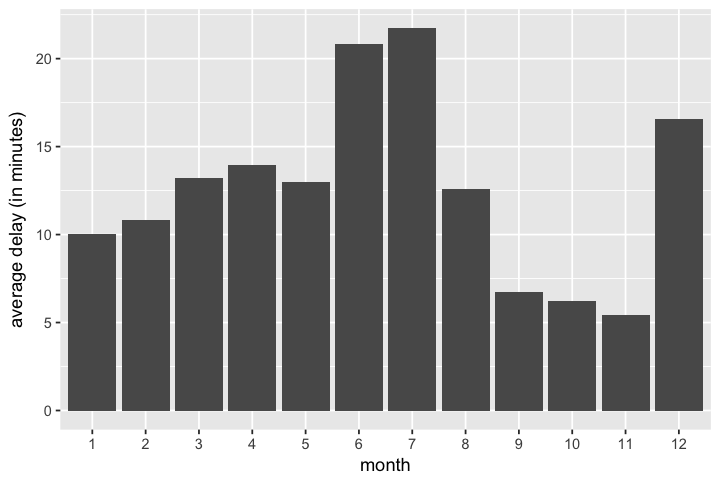

In [32]:
options(repr.plot.width=6, repr.plot.height=4) # to ensure we do not get very large plots

group_by(flights, year, month) %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE)) %>%
    ggplot() +
        geom_bar(mapping = aes(x=factor(month), y=delay), stat = "identity") +
        labs(x = "month", y = "average delay (in minutes)")